In [1]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [2]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


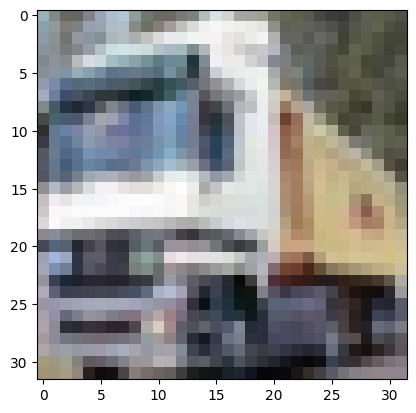

In [5]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [6]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# check model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [9]:
# train
history = model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10)



Epoch 1/10
391/391 [==============================] - 37s 63ms/step - loss: 1.8918 - accuracy: 0.2409
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 1.4030 - accuracy: 0.4698
Epoch 3/10
391/391 [==============================] - 24s 61ms/step - loss: 1.0413 - accuracy: 0.6275
Epoch 4/10
391/391 [==============================] - 23s 59ms/step - loss: 0.8296 - accuracy: 0.7112
Epoch 5/10
391/391 [==============================] - 23s 60ms/step - loss: 0.6641 - accuracy: 0.7729
Epoch 6/10
391/391 [==============================] - 24s 61ms/step - loss: 0.5362 - accuracy: 0.8182
Epoch 7/10
391/391 [==============================] - 24s 61ms/step - loss: 0.4223 - accuracy: 0.8566
Epoch 8/10
391/391 [==============================] - 24s 61ms/step - loss: 0.3394 - accuracy: 0.8857
Epoch 9/10
391/391 [==============================] - 24s 61ms/step - loss: 0.2695 - accuracy: 0.9110
Epoch 10/10
391/391 [==============================] - 24s 61ms/step - loss: 0.225

In [14]:
probabilities = model.predict(x_test, batch_size=64)
probabilities = np.argmax(probabilities, axis = 1)

display_images(validation_images, probabilities, validation_labels, "Bad predictions indicated in red.")

157/157 [==============================] - 2s 11ms/step


NameError: ignored

dict_keys(['loss', 'accuracy'])


KeyError: ignored

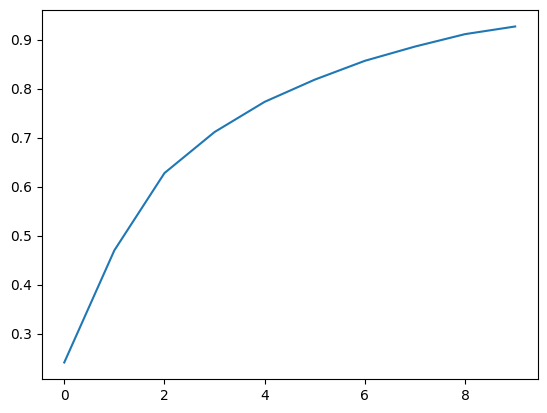

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
loss, accuracy = model.evaluate(valid_X, validation_labels, batch_size=64)

NameError: ignored

In [ ]:
# save model
model.save("keras-VGG16-cifar10.h5")

In [ ]:
# if you want to skip training, just load the model
'''
from keras.models import load_model
from matplotlib import pyplot as plt

model = load_model("keras-VGG16-cifar10.h5")
model.summary()
plt.imshow(x_test[1000])
result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)
'''